In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
mna = pd.read_csv('data/final_m&a.csv')

In [3]:
mna = mna[mna['sourcefilename'] == '2021\cq4\endfile.csv']
mna['closedDate'] = mna['closedDate'].apply(pd.to_datetime)
mna['Year'] = mna['closedDate'].apply(lambda x: x.year)
mna['Quarter'] = mna['closedDate'].apply(lambda x: x.quarter)
mna['Quarter'] = mna['Quarter'].apply(lambda x: 'q' + str(x))
mna['QuarterYear'] =  mna['Year'].astype(str) + '-' +  mna['Quarter'] 
mna.drop(columns=['Year', 'Quarter'], inplace=True)
mna.head()


C:\Users\anagh\AppData\Local\Temp\ipykernel_42564\4214253240.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mna['closedDate'] = mna['closedDate'].apply(pd.to_datetime)


,closedDate,dealvalue,transaction_id,taget_id,target_companytype,buyer_id,sourcefilename,QuarterYear
324319,2021-12-20,26722.03,IQTR1762126403,IQ259627,Private Company,IQ22247,2021\cq4\endfile.csv,2021-q4
324320,2021-12-17,294.26,IQTR1761797380,IQ1761797378,Private Company,IQ34583003,2021\cq4\endfile.csv,2021-q4
324321,2021-03-10,2134.94,IQTR1684256710,IQ312397938,Private Company,IQ6455049,2021\cq4\endfile.csv,2021-q1
324322,2021-09-12,739.78,IQTR1771796579,IQ250540201,Private Company,IQ884397,2021\cq4\endfile.csv,2021-q3
324323,2021-12-23,7444.39,IQTR1762441617,IQ270126961,Private Company,IQ127881,2021\cq4\endfile.csv,2021-q4


In [4]:
topBuyer = [(ind,c) for ind, c in mna['buyer_id'].value_counts()[0:5].items()]
topBuyer

[('IQ317627', 46),
 ('IQ277914', 43),
 ('IQ31348', 42),
 ('IQ162270', 39),
 ('IQ382553', 38)]

In [5]:
nodeGraph = pd.read_csv('data/node_graph_merged_file.csv')
nodeGraph.head()
nodeGraph['QuarterYear'] =  nodeGraph['Year'].astype(str) + '-' +  nodeGraph['Quarter'] 
nodeGraph.drop(columns=['Year','Quarter'], inplace=True)
nodeGraph.head()

,node,indegree,outdegree,katz,katz_eigen,clustering,dir_clustering,w_clustering,weight_dir_clustering,weighted_eigenvector,closeness,directed_betweenness,undirected_betweenness,undirected_Weighted_betweenness,harmonic,undirected_harmonic,QuarterYear
0,IQ92699,0.000000,0.000917,0.028476,0.000008,0.0,0.0,0.0,0.0,-6.571302e-15,0.000000,0.0,0.000000,0.000000,1.0,1.0,2003-q1
1,IQ27093,0.000917,0.000000,0.031323,0.000072,0.0,0.0,0.0,0.0,9.289687e-10,0.000917,0.0,0.000000,0.000000,1.0,2.5,2003-q1
2,IQ18759,0.000000,0.000917,0.028476,0.000008,0.0,0.0,0.0,0.0,1.532253e-14,0.000000,0.0,0.000000,0.000000,1.0,1.5,2003-q1
3,IQ265308,0.001835,0.000000,0.034171,0.000054,0.0,0.0,0.0,0.0,-6.860781e-10,0.001835,0.0,0.000003,0.000003,0.0,2.5,2003-q1
4,IQ21407,0.000000,0.001835,0.028476,0.000008,0.0,0.0,0.0,0.0,-1.951695e-15,0.000000,0.0,0.000003,0.000003,1.0,1.0,2003-q1


the graph analysis for the variables

In [6]:
buyer1_mna = mna[mna['buyer_id'] == topBuyer[0][0]]
buyer1_ng = nodeGraph[nodeGraph['node'] == topBuyer[0][0]]

In [7]:
buyer1_td = buyer1_mna.groupby(["QuarterYear"]).agg({"transaction_id": "count", "dealvalue": "sum"}).reset_index()
buyer1_td = buyer1_td.rename(columns={"transaction_id": "Number of Deals", "dealvalue": "Total Deal Value"})
# Combine the quarters and years into a single column


In [8]:
buyer1_td

,QuarterYear,Number of Deals,Total Deal Value
0,2001-q1,2,764.67
1,2001-q2,2,168.33
2,2002-q2,2,155.00
3,2004-q2,1,605.69
4,2004-q4,1,90.49
5,2005-q2,3,22404.17
6,2006-q1,1,78.74
7,2007-q2,2,96.23
8,2010-q3,1,338.99
9,2010-q4,1,282.88


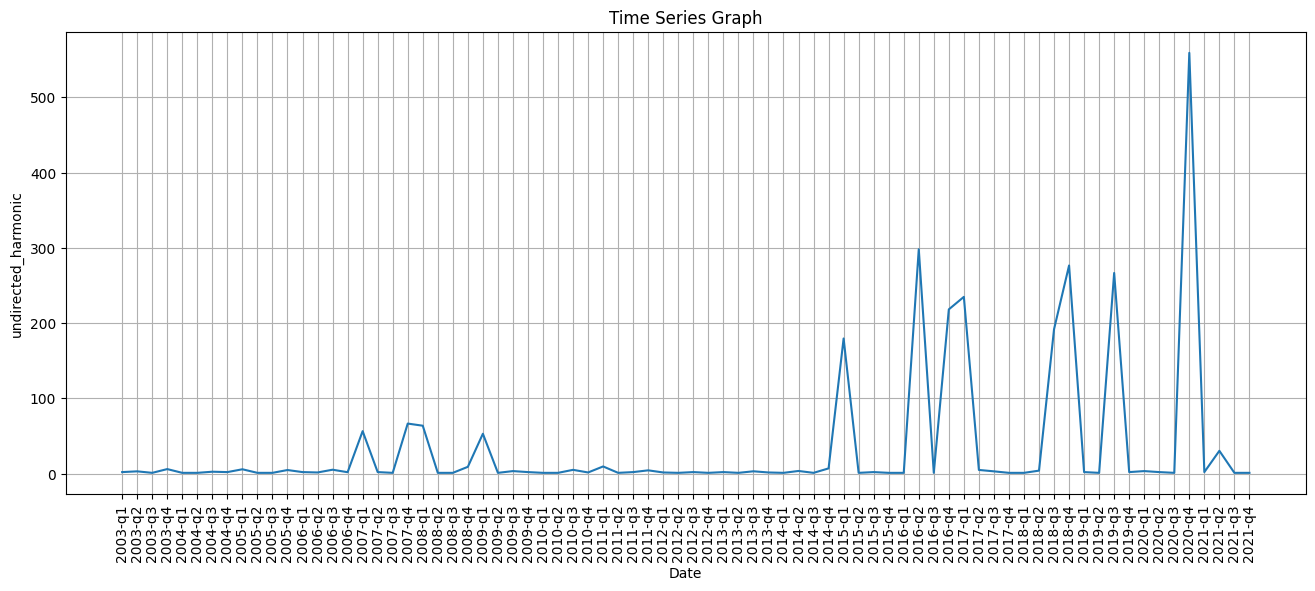

In [34]:
# Plotting the time series graph
plt.figure(figsize=(16, 6))
plt.plot(buyer1_ng['QuarterYear'], buyer1_ng['undirected_harmonic'])
plt.xlabel('Date')
plt.ylabel('undirected_harmonic')
plt.xticks(rotation=90)
plt.title('Time Series Graph')
plt.grid(True)
plt.show()

In [33]:
# Perform the ADF test
result = adfuller(buyer1_ng['katz_eigen'])

# Extract test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Print the test statistic and p-value
print('ADF Test Statistic:', test_statistic)
print('p-value:', p_value)

ADF Test Statistic: -9.590455299794046
p-value: 2.0427124964007488e-16


In [ ]:
merged_data = pd.merge(buyer1_ng, buyer1_td, on="QuarterYear", how = 'outer')

In [ ]:
merged_data